In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [3]:
data_set = np.loadtxt('./data/ThoraricSurgery3.csv', delimiter=',')

In [4]:
data_set[:10, 0:16]

array([[ 1.  ,  2.88,  2.16,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         3.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 60.  ],
       [ 2.  ,  3.4 ,  1.88,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 51.  ],
       [ 2.  ,  2.76,  2.08,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 59.  ],
       [ 2.  ,  3.68,  3.04,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 54.  ],
       [ 2.  ,  2.44,  0.96,  2.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 73.  ],
       [ 2.  ,  2.48,  1.88,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 51.  ],
       [ 2.  ,  4.36,  3.28,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  , 59.  ],
       [ 1.  ,  3.19,  2.5 ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0. 

In [5]:
X = data_set[:, 0:16] # 요소가 16개인 데이터
y = data_set[:, 16]   # label(X요소의 결과)

In [7]:
print(X.shape)
print(y.shape)

(470, 16)
(470,)


In [10]:
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                510       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 [==============================] - 1s 2ms/step - loss: 0.5744 - accuracy: 0.8340
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.8468
Epoch 3/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.8489


# 최소제곱법으로 단순회귀 분석(Simple linear regression) 모델 생성

In [27]:
import numpy as np

X = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

X_mean = np.mean(X)
y_mean = np.mean(y)

print(f'X의 평균값 : {X_mean}, y의 평균값 : {y_mean}')

X의 평균값 : 5.0, y의 평균값 : 90.5


기울기 공식
$$기울기(a) = \frac{\sum(x-x의평균)(y-y의평균)}{\sum(x-x의평균)^2}$$

In [28]:
deviser = sum([(i - X_mean)**2 for i in X])

In [29]:
top = 0
for i in range(len(X)):
    top += (X[i] - X_mean) * (y[i] - y_mean)
    
a = top / deviser
print('기울기 : ', a)

기울기 :  2.3


$$절편(b) = y\_mean - 기울기 \times X\_mean$$

In [30]:
b = y_mean - a * X_mean
print('절편 : ', b)

절편 :  79.0


In [31]:
pred_y = [a * i + b for i in X] # 예측값
print(pred_y)

[83.6, 88.2, 92.8, 97.4]


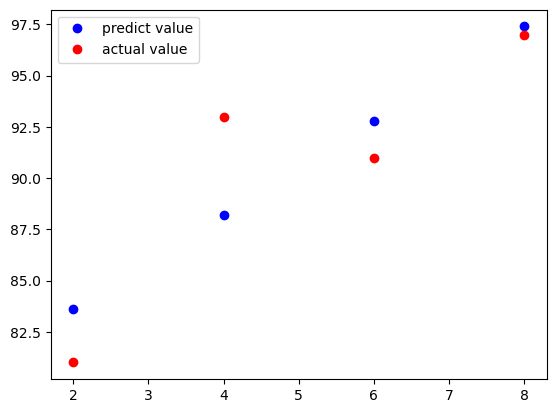

In [37]:
import matplotlib.pyplot as plt

plt.plot(X, pred_y, 'o', color='blue', label='predict value')
plt.plot(X, y, 'o', color='red', label='actual value')
plt.legend()
plt.show()

## 평균 제곱 오차(MSE)
$$MSE = \frac{1}{n}\sum(y_i - \hat{y})^2 : \hat{y} = ax_i + b \to 예측값$$

In [34]:
# a, b의 초기값을 설정 하고 계산
fake_a = 3
fake_b = 76

# 공부시간과 성적 생성
X = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

def predict(x):
    return x * fake_a + fake_b

prid_resut = [predict(i) for i in X] # 예측값 생성

# 평균제곱 오차값
mse_result = sum([(y[i] - prid_resut[i])**2 for i in range(len(y))]) / len(y)
for x_value, y_vvalue, y_predict in zip(X, y, prid_resut):
    print("X값 : {}, 실제값 : {}, 예측값 : {}".format(x_value, y_vvalue, y_predict))
print('평균제곱오차 :', mse_result)

X값 : 2, 실제값 : 81, 예측값 : 82
X값 : 4, 실제값 : 93, 예측값 : 88
X값 : 6, 실제값 : 91, 예측값 : 94
X값 : 8, 실제값 : 97, 예측값 : 100
평균제곱오차 : 11.0


## 경사하강법
$$MSE = \frac{1}{n}\sum(y_i - (ax_i + b))^2$$
$$a로편미분한 결과 = \frac{2}{n}\sum-x_i(y_i - (ax_i + b))$$
$$b로편미분한 결과 = \frac{2}{n}\sum-(y_i - (ax_i + b))$$

epoch : 0,  기울기 : 27.84,  절편 : 5.43
epoch : 100,  기울기 : 7.073858435872394,  절편 : 50.51166161138297
epoch : 200,  기울기 : 4.095999380762421,  절편 : 68.28224379060177
epoch : 300,  기울기 : 2.9756829100119027,  절편 : 74.96781336233505
epoch : 400,  기울기 : 2.5542024233262106,  절편 : 77.48302865233052
epoch : 500,  기울기 : 2.3956349066513707,  절편 : 78.42929177728175
epoch : 600,  기울기 : 2.3359793398132864,  절편 : 78.78529068727728
epoch : 700,  기울기 : 2.313535987420573,  절편 : 78.91922301600925
epoch : 800,  기울기 : 2.3050924490666174,  절편 : 78.96961044185792
epoch : 900,  기울기 : 2.3019158585694823,  절편 : 78.98856697541248
epoch : 1000,  기울기 : 2.3007207758016315,  절편 : 78.99569871827002
epoch : 1100,  기울기 : 2.300271167070735,  절편 : 78.99838179089187
epoch : 1200,  기울기 : 2.3001020172709508,  절편 : 78.9993912045567
epoch : 1300,  기울기 : 2.300038380484562,  절편 : 78.99977096168232
epoch : 1400,  기울기 : 2.3000144393354365,  절편 : 78.9999138322214
epoch : 1500,  기울기 : 2.3000054323026444,  절편 : 78.99996758234106
epoch

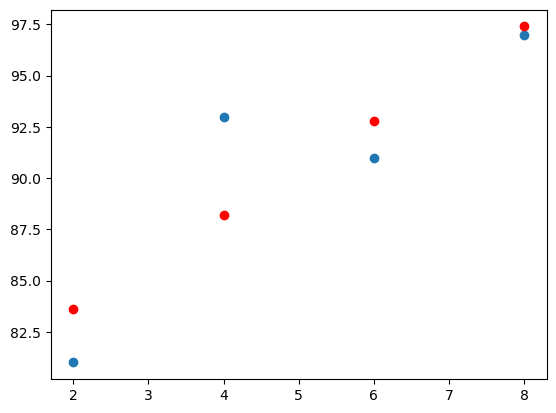

In [36]:
X = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

a = 0; b = 0  # 기울기 절편을 0으로 초기화
lr = 0.03     # 학습률 설정
epoch = 2001  # 2001회 반복
n = len(X)

for i in range(epoch):
    y_pred = a * X + b # 예측값 구함
    err = y - y_pred   # 실제값과 예측값 차이를 구함
    
    a_diff = (2/n) * sum(-X * err)
    b_diff = (2/n) * sum(-err)
    a = a - lr * a_diff # 다음 적용할 a 값 수정
    b = b - lr * b_diff # 다음 적용할 b 값 수정
    
    if i%100 == 0:
        print("epoch : {},  기울기 : {},  절편 : {}".format(i, a, b))
        
# 최종 a, b를 적용하여 예측값구함
y_pred = a * X + b

plt.scatter(X, y)
plt.scatter(X, y_pred, color='red')
plt.show()